In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from recognize_word import *

In [21]:
path = 'word-images/word4.png'
word = cv2.imread(path, cv2.IMREAD_GRAYSCALE)

In [22]:
kernel = np.ones((5,5),np.uint8)
_, word = cv2.threshold(word,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
word = 255 - word
#word = cv2.morphologyEx(word, cv2.MORPH_OPEN, kernel)
#word = cv2.erode(word,kernel,iterations = 1)
word = 255 - word

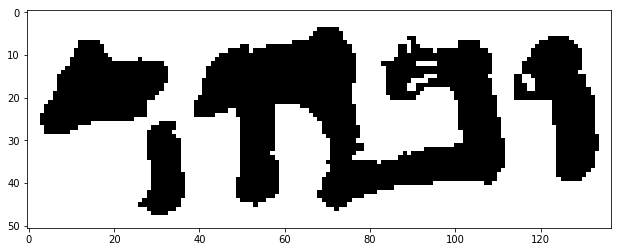

In [23]:
plt.figure(figsize = (500,4))
plt.imshow(word, cmap='gray', aspect = 1)
plt.show()

In [24]:
recognition = recognize_word(word)
print("The best matching word is:", recognition)

20 1 21
2 21 26
13 26 5
4 words,  27  possible combinations
Nun-medial_Bet_Taw
Total: 0
Zayin_Bet_Taw
Total: 0
He_Bet_Taw
Total: 0
Nun-medial_Tet_Taw
Total: 0
Zayin_Tet_Taw
Total: 0
He_Tet_Taw
Total: 0
Nun-medial_Zayin_Taw
Total: 0
Zayin_Zayin_Taw
Total: 0
He_Zayin_Taw
Total: 0
Nun-medial_Bet_Ayin
Total: 0
Zayin_Bet_Ayin
Total: 0
He_Bet_Ayin
Total: 0
Nun-medial_Tet_Ayin
Total: 0
Zayin_Tet_Ayin
Total: 0
He_Tet_Ayin
Total: 0
Nun-medial_Zayin_Ayin
Total: 0
Zayin_Zayin_Ayin
Total: 0
He_Zayin_Ayin
Total: 0
Nun-medial_Bet_Tet
Total: 0
Zayin_Bet_Tet
Total: 0
He_Bet_Tet
Total: 0
Nun-medial_Tet_Tet
Total: 0
Zayin_Tet_Tet
Total: 0
He_Tet_Tet
Total: 0
Nun-medial_Zayin_Tet
Total: 0
Zayin_Zayin_Tet
Total: 0
He_Zayin_Tet
Total: 0
The best matching word is: Nun-medial_Bet_Taw
